# Decision Trees: Lending Club

## Setup

In [1]:
# Load packages
import io
import requests 

import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split                                     

from matplotlib import pyplot as plt
import seaborn as sns

# Set options
%matplotlib inline
sns.set()
pd.options.display.float_format = '{:,.2f}'.format

# Seed the random number generator for reproducible results
random_state = 10
np.random.seed(random_state)

In [2]:
# Download data
url = 'https://raw.githubusercontent.com/natecraig/aiml/main/Data/Lending Club Example.csv'
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')), low_memory=False)
df.head()
df.shape

(20000, 30)

In [3]:
# List columns of data
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'loan_status', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc'],
      dtype='object')

In [4]:
# Output the first 10 rows of the data
df.head(10)

,id,loan_amnt,funded_amnt,loan_status,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc
0,28733414,"15,000.00","15,000.00",Charged Off,"15,000.00",36 months,10.15,485.07,B,B2,...,19.77,1.00,Mar-1989,695.00,699.00,0.00,11.00,0.00,"14,908.00",23.00
1,41329342,"11,500.00","11,500.00",Current,"11,500.00",60 months,13.33,263.61,C,C3,...,27.75,0.00,May-2004,685.00,689.00,0.00,20.00,0.00,"14,695.00",33.00
2,10099202,"17,700.00","17,700.00",Charged Off,"17,700.00",36 months,13.53,600.92,B,B5,...,19.10,1.00,Sep-1996,660.00,664.00,0.00,8.00,0.00,"2,061.00",15.00
3,8396020,"15,000.00","15,000.00",Fully Paid,"15,000.00",36 months,11.99,498.15,B,B3,...,10.78,0.00,Oct-2001,720.00,724.00,1.00,11.00,0.00,"8,559.00",17.00
4,10101000,"20,000.00","20,000.00",Fully Paid,"20,000.00",36 months,8.90,635.07,A,A5,...,25.50,0.00,Sep-1986,695.00,699.00,0.00,13.00,0.00,"71,393.00",37.00
5,13257017,"15,000.00","15,000.00",Fully Paid,"15,000.00",36 months,10.99,491.01,B,B2,...,33.82,0.00,Aug-2000,750.00,754.00,0.00,8.00,0.00,"14,987.00",11.00
6,16471709,"15,000.00","15,000.00",Fully Paid,"15,000.00",60 months,17.57,377.41,D,D4,...,15.17,0.00,Sep-2002,665.00,669.00,0.00,16.00,1.00,"16,767.00",26.00
7,21890906,"11,050.00","11,050.00",Charged Off,"11,050.00",36 months,13.35,374.19,C,C2,...,21.90,0.00,Jul-1990,670.00,674.00,0.00,7.00,1.00,"8,851.00",23.00
8,3370690,"17,600.00","17,600.00",Charged Off,"17,600.00",60 months,17.77,444.73,D,D1,...,22.68,0.00,Feb-2001,675.00,679.00,2.00,14.00,0.00,"25,928.00",30.00
9,14490592,"9,225.00","9,225.00",Fully Paid,"9,225.00",36 months,15.31,321.19,C,C4,...,24.82,0.00,Aug-2010,700.00,704.00,0.00,6.00,0.00,"4,158.00",6.00


In [5]:
# Determine whether each borrower is a defaulter (1) or repayer (0)
def loan_default(loan_status):
    if loan_status == 'Default' or loan_status == 'Charged Off':
        return 1

    return 0


df['default'] = df['loan_status'].apply(loan_default)
df['default'].value_counts()

0    13507
1     6493
Name: default, dtype: int64

In [6]:
# What percent of borrowers do not default?
1 - df['default'].mean()

0.67535

## Example Decision Tree

In [7]:
# Extract features (X) and target (y)
feature_names = ['dti', 'fico_range_high']
X = df[feature_names]
y = df['default']

# Split data into training and testing sets
(X_train, X_test, 
 y_train, y_test) = train_test_split(X, y, test_size=0.2,
                                     stratify=y, random_state=random_state)

In [8]:
# Fit a decision tree with depth 1 and assess performance using accuracy
# on training data
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=random_state)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_train)
print(f'Training Accuracy: {accuracy_score(y_train, y_pred):.4f}')

y_test_pred = tree_clf.predict(X_test)
print(f'Testing Accuracy: {accuracy_score(y_test, y_test_pred):.4f}')

Training Accuracy: 0.7542
Testing Accuracy: 0.7450


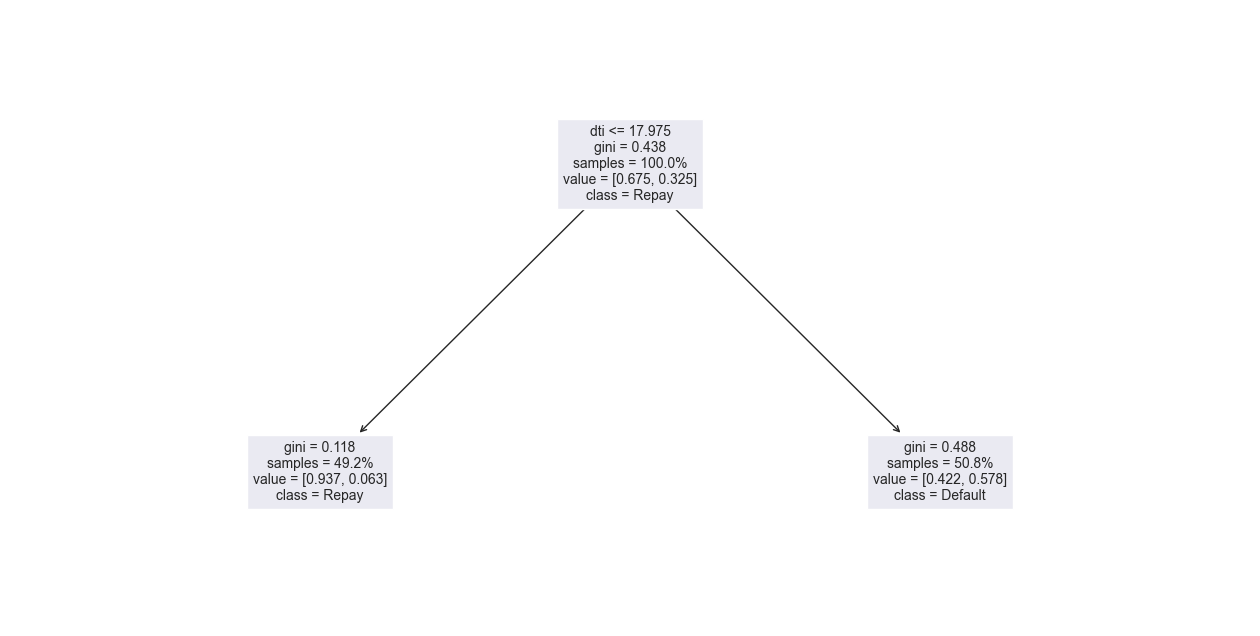

In [9]:
# Visualize the decision tree
class_names = ['Repay', 'Default']
fig = plt.figure(figsize=(16, 8))
tree.plot_tree(tree_clf, proportion=True,
               feature_names=feature_names,
               class_names=class_names, fontsize=10)
plt.show()

## Exercise

Observe how the decision tree's rules and performance change as you add features and increase the depth of the tree.

To add features, append column names to the `feature_names` list in Cell 7. For example, add `'loan_amnt'` to the list.

To increase the depth of the tree, increase the value of `max_depth` in Cell 8.